In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

print("Training set columns:")
print(train_data.head())

print("Testing set columns:")
print(test_data.head())

Training set columns:
  class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0     d  67  51  68  115  69  111  136  31  67  ...                -9.17   
1     s  67  28  51   99  50   97   82  26  59  ...                -2.25   
2     s  63  26  50   95  49   91   81  26  57  ...                -0.44   
3     d  63  42  63   97  66  108  111  28  59  ...                -2.34   
4     s  46  27  50   83  51   90   76  26  56  ...                 1.25   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.27                -1.80                -6.32   
1               -20.13                -2.11                -6.35   
2               -17.64                -1.81                -4.70   
3               -20.20                -1.89                -5.47   
4               -18.62                -2.17                -7.11   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -20.88                -1.63 

In [3]:
columns = train_data.columns

# 删除以 "pred minus obs" 开头的列
columns_to_drop = [col for col in columns if col.startswith('pred minus obs')]
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

columns_to_keep = ['class'] + ['b{}'.format(i) for i in range(1, 10)]
train_data = train_data[columns_to_keep]
test_data = test_data[columns_to_keep]

In [4]:
class_counts = train_data['class'].value_counts()

print("Class counts:")
print(class_counts)

Class counts:
s    136
d    105
o     46
h     38
Name: class, dtype: int64


In [5]:
label_train = train_data.iloc[:, 0]
label_test = test_data.iloc[:, 0]

data_train = train_data.iloc[:, 1:].values
data_test = test_data.iloc[:, 1:].values

scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.fit_transform(data_test)

data_scaled = pd.DataFrame(data=data_train_scaled, columns=train_data.columns[1:])
train_data = pd.concat([pd.DataFrame(data=label_train, columns=['class']), data_scaled], axis=1)

data_scaled = pd.DataFrame(data=data_test_scaled, columns=test_data.columns[1:])
test_data = pd.concat([pd.DataFrame(data=label_test, columns=['class']), data_scaled], axis=1)

In [6]:
train_data = train_data[train_data['class'].isin(['s', 'd'])]
test_data = test_data[test_data['class'].isin(['s', 'd'])]

In [7]:
class_counts = train_data['class'].value_counts()

print("Class counts:")
print(class_counts)

Class counts:
s    136
d    105
Name: class, dtype: int64


In [8]:
y_train = train_data.iloc[:, 0].values
X_train = train_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values

In [9]:
clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9292035398230089


In [12]:
samples = test_data.sample(n=10, random_state=1)

print(samples)

    class        b1        b2        b3        b4        b5        b6  \
161     d  0.169014  0.162963  0.167785  0.228814  0.240741  0.192308   
76      d  0.323944  0.214815  0.154362  0.211864  0.555556  0.326923   
107     d  0.098592  0.111111  0.114094  0.262712  0.240741  0.230769   
146     d  0.281690  0.185185  0.147651  0.398305  0.370370  0.442308   
127     s  0.436620  0.022222  0.026846  0.381356  0.092593  0.076923   
181     s  0.436620  0.022222  0.033557  0.330508  0.092593  0.115385   
175     s  0.239437  0.051852  0.053691  0.194915  0.018519  0.019231   
110     d  0.309859  0.177778  0.147651  0.500000  0.351852  0.519231   
52      s  0.408451  0.022222  0.033557  0.372881  0.111111  0.153846   
60      d  0.267606  0.111111  0.093960  0.322034  0.296296  0.288462   

           b7        b8        b9  
161  0.400000  0.081967  0.050847  
76   0.470588  0.081967  0.101695  
107  0.258824  0.032787  0.016949  
146  0.588235  0.081967  0.084746  
127  0.282353  0

In [13]:
# 将选择的样本特征提取出来
X_samples = samples.iloc[:, 1:]

# 对选择的样本进行预测并获取预测概率
y_proba = clf.predict_proba(X_samples)

E:\miniconda3\envs\cits5508-2023\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


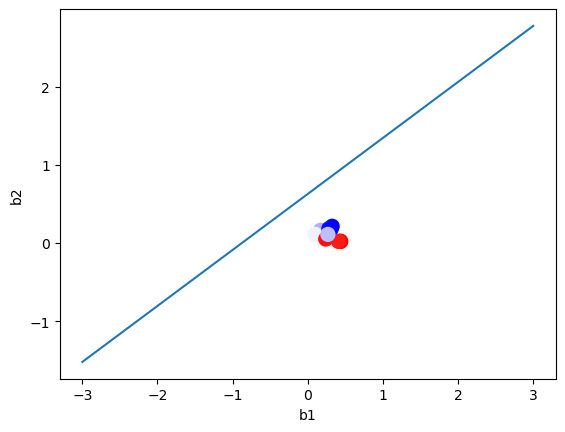

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 将预测概率和样本特征绘制成图表
fig, ax = plt.subplots()

# 绘制样本的散点图
ax.scatter(samples.iloc[:, 1], samples.iloc[:, 2], c=y_proba[:, 1], cmap='bwr', s=100)
ax.set_xlabel('b1')
ax.set_ylabel('b2')

# 绘制决策边界
coef = clf.coef_[0]
intercept = clf.intercept_[0]
x = np.linspace(-3, 3, 50)
y = (-coef[0]*x - intercept) / coef[1]
ax.plot(x, y)

plt.show()